# Step 1: Load and Preview the Data

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data_2019 = pd.read_excel(r"C:\Users\VALUE\Downloads\Bangalore Schools 2019.xlsx")
data_2020 = pd.read_excel(r"C:\Users\VALUE\Downloads\Bangalore Schools 2020.xlsx")
data_2021 = pd.read_excel(r"C:\Users\VALUE\Downloads\Bangalore Schools 2021.xlsx")

# Preview data
data_2019.head()

,Student Roll,Student Name,Hindi,English,Mathematics,Physics,Chemistry,Biology,History,Geography,Civics,Computer Science,Physical Education
0,1001,Akash Ahuja,30,95,78,92,84,36,47,82,44,14,74
1,1002,Mohit Srivatsav,32,46,65,53,28,77,36,76,74,77,27
2,1003,Anshika Mehra,87,91,74,81,88,100,45,37,10,44,11
3,1004,Visakha Tamboli,65,83,83,78,45,61,16,89,52,23,50
4,1005,Raju Deshmukh,84,66,98,62,68,99,70,61,65,75,87


In [8]:
data_2020.head()

,Student Roll,Student Name,Hindi,English,Mathematics,Physics,Chemistry,Biology,History,Geography,Civics,Computer Science,Physical Education
0,1001,Akash Ahuja,39,74,87,92,84,36,47,82,44,81,78
1,1002,Mohit Srivatsav,72,38,97,53,28,77,36,76,74,68,81
2,1003,Anshika Mehra,82,52,94,81,88,100,45,37,10,36,69
3,1004,Visakha Tamboli,44,68,62,78,45,61,16,89,52,37,45
4,1005,Raju Deshmukh,83,49,44,62,68,99,70,61,65,82,39


In [9]:
data_2021.head()

,Student Roll,Student Name,Hindi,English,Mathematics,Physics,Chemistry,Biology,History,Geography,Civics,Computer Science,Physical Education
0,1001,Akash Ahuja,55,63,93,66,59,20,84,61,55,63,80
1,1002,Mohit Srivatsav,64,62,53,69,81,35,35,67,44,72,78
2,1003,Anshika Mehra,89,64,53,51,80,52,83,22,53,94,49
3,1004,Visakha Tamboli,67,61,52,54,21,30,23,23,61,78,46
4,1005,Raju Deshmukh,68,97,62,78,80,25,71,74,74,62,50


# Step 2: Analyze and Reward the Top Performer

Top Performers:
    Student Roll          Student Name  cumulative_marks
0           1001           Akash Ahuja              4238
13          1014          Albert Pinto              3500
7           1008        Anamika Kumari              4124
2           1003         Anshika Mehra              4104
5           1006            Aruna Iyer              4076
11          1012         Ganesh Sekhar              4302
18          1019        Gurpreet Singh              3908
15          1016             Md. Yusuf              4138
1           1002       Mohit Srivatsav              3902
19          1020          Nisha Saxena              4640
8           1009          Piyush Pande              3956
12          1013         Praddep Meena              4192
14          1015           Raheem Khan              4344
4           1005         Raju Deshmukh              4596
6           1007          Ramesh Gowda              3838
16          1017          Rashmi Desai              4232
17          101

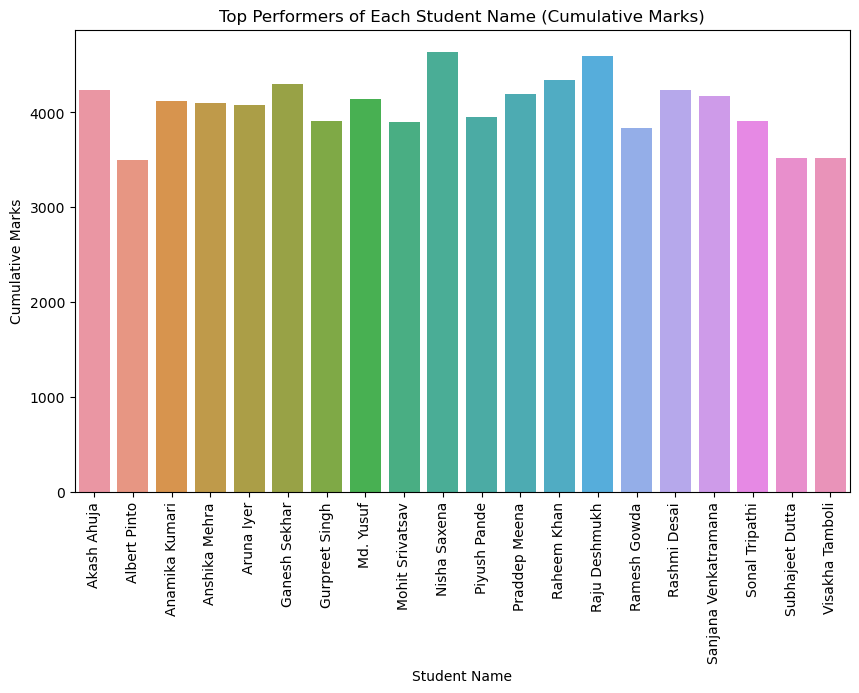

In [11]:
# Calculate total marks for each year
data_2019['total_marks_2019'] = data_2019.iloc[:, 2:].sum(axis=1)
data_2020['total_marks_2020'] = data_2020.iloc[:, 2:].sum(axis=1)
data_2021['total_marks_2021'] = data_2021.iloc[:, 2:].sum(axis=1)

# Merge the dataframes on 'Student Roll' and 'Student Name'
merged_data = pd.merge(data_2019, data_2020, on=['Student Roll', 'Student Name'], suffixes=('_2019', '_2020'))
merged_data = pd.merge(merged_data, data_2021, on=['Student Roll', 'Student Name'])

# Calculate cumulative marks
merged_data['cumulative_marks'] = merged_data['total_marks_2019'] + merged_data['total_marks_2020'] + merged_data['total_marks_2021']

# Identify top performer for each school (Student Name in this case)
top_performers = merged_data.loc[merged_data.groupby('Student Name')['cumulative_marks'].idxmax()]

print("Top Performers:")
print(top_performers[['Student Roll', 'Student Name', 'cumulative_marks']])

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=top_performers, x='Student Name', y='cumulative_marks')
plt.xticks(rotation=90)
plt.title('Top Performers of Each Student Name (Cumulative Marks)')
plt.xlabel('Student Name')
plt.ylabel('Cumulative Marks')
plt.show()


In [21]:
# Combine the data for all years
combined_data = data_2019[['Student Roll', 'Student Name']].copy()
combined_data['Total_2019'] = data_2019.drop(columns=['Student Roll', 'Student Name']).sum(axis=1)
combined_data['Total_2020'] = data_2020.drop(columns=['Student Roll', 'Student Name']).sum(axis=1)
combined_data['Total_2021'] = data_2021.drop(columns=['Student Roll', 'Student Name']).sum(axis=1)
combined_data['Cumulative Total'] = combined_data[['Total_2019', 'Total_2020', 'Total_2021']].sum(axis=1)

# Find the top performer
top_performer = combined_data.loc[combined_data['Cumulative Total'].idxmax()]

print("Top Performer:", top_performer['Student Name'])


Top Performer: Nisha Saxena


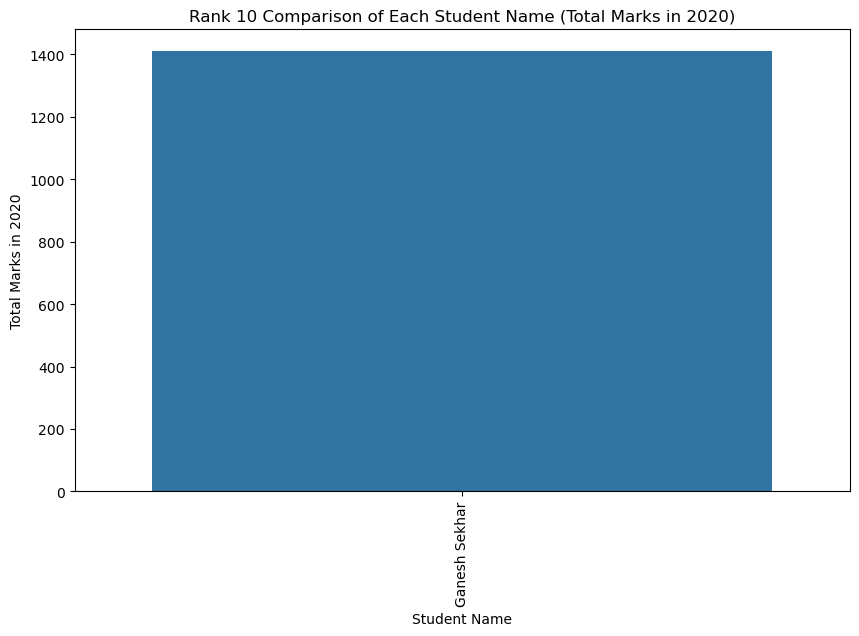

In [18]:
# Rank students based on total marks in 2020
data_2020['rank'] = data_2020['total_marks_2020'].rank(method='first', ascending=False)

# Extract Rank 10 students
rank_10_students = data_2020[data_2020['rank'] == 10]

# Check if rank_10_students is empty
if rank_10_students.empty:
    print("No students with rank 10 found.")
else:
    # Visualization
    plt.figure(figsize=(10, 6))
    sns.barplot(data=rank_10_students, x='Student Name', y='total_marks_2020')
    plt.xticks(rotation=90)
    plt.title('Rank 10 Comparison of Each Student Name (Total Marks in 2020)')
    plt.xlabel('Student Name')
    plt.ylabel('Total Marks in 2020')
    plt.show()

In [22]:
# Rank students based on 2020 marks
combined_data['Rank_2020'] = combined_data['Total_2020'].rank(ascending=False)
combined_data_sorted = combined_data.sort_values(by='Total_2020', ascending=False)

print(combined_data_sorted[['Student Name', 'Total_2020', 'Rank_2020']])


            Student Name  Total_2020  Rank_2020
14           Raheem Khan      2278.0        1.0
19          Nisha Saxena      2258.0        2.0
0            Akash Ahuja      2235.0        3.0
16          Rashmi Desai      2182.0        4.0
4          Raju Deshmukh      2171.0        5.0
12         Praddep Meena      2166.0        6.0
7         Anamika Kumari      2161.0        7.0
5             Aruna Iyer      2156.0        8.0
17  Sanjana Venkatramana      2142.0        9.0
11         Ganesh Sekhar      2125.0       10.0
1        Mohit Srivatsav      2111.0       11.0
2          Anshika Mehra      2094.0       12.0
18        Gurpreet Singh      1999.0       13.0
15             Md. Yusuf      1947.0       14.0
8           Piyush Pande      1946.0       15.0
10        Sonal Tripathi      1885.0       16.0
6           Ramesh Gowda      1880.0       17.0
3        Visakha Tamboli      1809.0       18.0
9        Subhajeet Dutta      1774.0       19.0
13          Albert Pinto      1664.0    

In [23]:
# Rank students based on 2020 marks
combined_data['Rank_2020'] = combined_data['Total_2020'].rank(ascending=False)
combined_data_sorted = combined_data.sort_values(by='Total_2020', ascending=False)

print(combined_data_sorted[['Student Name', 'Total_2020', 'Rank_2020']])


            Student Name  Total_2020  Rank_2020
14           Raheem Khan      2278.0        1.0
19          Nisha Saxena      2258.0        2.0
0            Akash Ahuja      2235.0        3.0
16          Rashmi Desai      2182.0        4.0
4          Raju Deshmukh      2171.0        5.0
12         Praddep Meena      2166.0        6.0
7         Anamika Kumari      2161.0        7.0
5             Aruna Iyer      2156.0        8.0
17  Sanjana Venkatramana      2142.0        9.0
11         Ganesh Sekhar      2125.0       10.0
1        Mohit Srivatsav      2111.0       11.0
2          Anshika Mehra      2094.0       12.0
18        Gurpreet Singh      1999.0       13.0
15             Md. Yusuf      1947.0       14.0
8           Piyush Pande      1946.0       15.0
10        Sonal Tripathi      1885.0       16.0
6           Ramesh Gowda      1880.0       17.0
3        Visakha Tamboli      1809.0       18.0
9        Subhajeet Dutta      1774.0       19.0
13          Albert Pinto      1664.0    

# The highest improvement for each subject from 2019-21 combining all the schools together

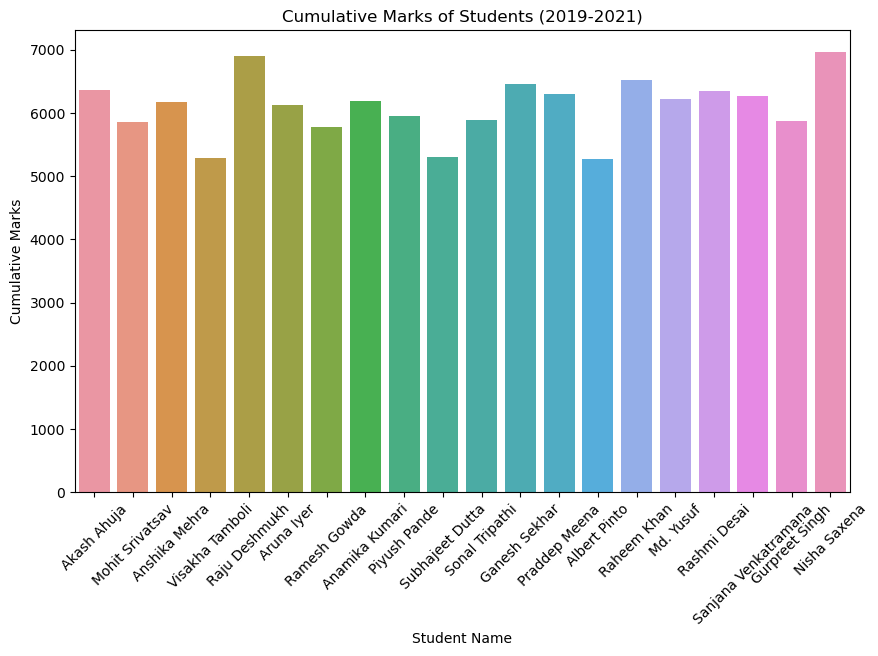

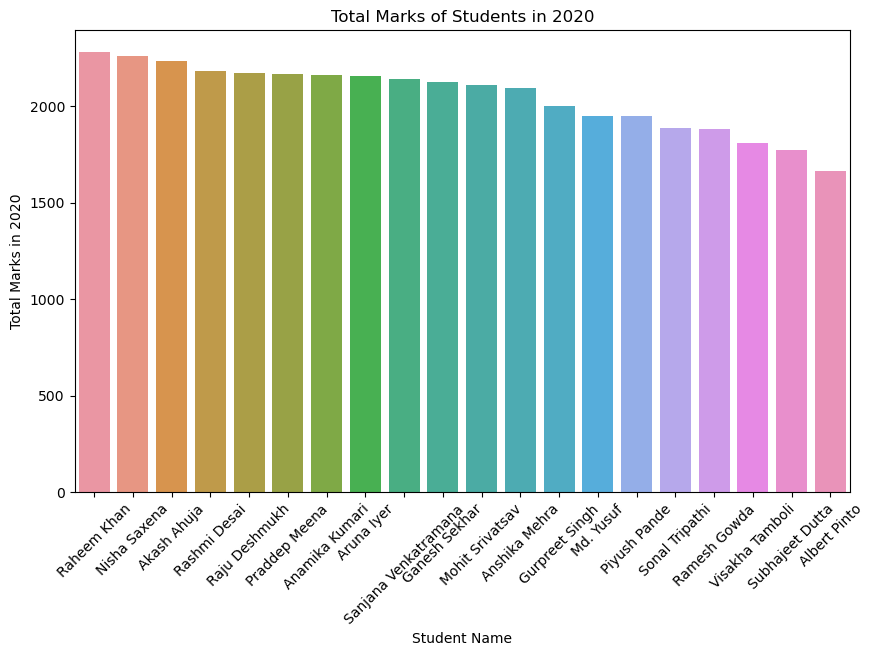

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize cumulative marks
plt.figure(figsize=(10, 6))
sns.barplot(x='Student Name', y='Cumulative Total', data=combined_data)
plt.title('Cumulative Marks of Students (2019-2021)')
plt.xlabel('Student Name')
plt.ylabel('Cumulative Marks')
plt.xticks(rotation=45)
plt.show()

# Visualize ranks for 2020
plt.figure(figsize=(10, 6))
sns.barplot(x='Student Name', y='Total_2020', data=combined_data_sorted)
plt.title('Total Marks of Students in 2020')
plt.xlabel('Student Name')
plt.ylabel('Total Marks in 2020')
plt.xticks(rotation=45)
plt.show()


# Step 4: Identify Best School for Arts, Science, and Commerce Streams

In [25]:
# Define subjects by stream
arts_subjects = ['Hindi', 'English', 'History', 'Geography', 'Civics']
science_subjects = ['Mathematics', 'Physics', 'Chemistry', 'Biology', 'Computer Science']
commerce_subjects = ['Hindi', 'English', 'Mathematics', 'Computer Science', 'Physical Education']

# Calculate total marks for each stream in each year
combined_data['Arts_Total'] = (data_2019[arts_subjects].sum(axis=1) +
                               data_2020[arts_subjects].sum(axis=1) +
                               data_2021[arts_subjects].sum(axis=1))

combined_data['Science_Total'] = (data_2019[science_subjects].sum(axis=1) +
                                  data_2020[science_subjects].sum(axis=1) +
                                  data_2021[science_subjects].sum(axis=1))

combined_data['Commerce_Total'] = (data_2019[commerce_subjects].sum(axis=1) +
                                   data_2020[commerce_subjects].sum(axis=1) +
                                   data_2021[commerce_subjects].sum(axis=1))

# Identify the best school for each stream
best_arts = combined_data.loc[combined_data['Arts_Total'].idxmax()]['Student Name']
best_science = combined_data.loc[combined_data['Science_Total'].idxmax()]['Student Name']
best_commerce = combined_data.loc[combined_data['Commerce_Total'].idxmax()]['Student Name']

print(f"Best school for Arts: {best_arts}")
print(f"Best school for Science: {best_science}")
print(f"Best school for Commerce: {best_commerce}")


Best school for Arts: Nisha Saxena
Best school for Science: Anshika Mehra
Best school for Commerce: Sanjana Venkatramana


# Step 5: Categorize Marks and Count Students in Each Category

In [27]:
# Define the categories
def categorize_marks(mark):
    if mark <= 20:
        return 'Very Poor'
    elif mark <= 40:
        return 'Poor'
    elif mark <= 60:
        return 'Average'
    elif mark <= 80:
        return 'Good'
    else:
        return 'Very Good'

# Apply categorization
categories = ['Very Poor', 'Poor', 'Average', 'Good', 'Very Good']
years = ['2019', '2020', '2021']

category_counts = {}

for year, data in zip(years, [data_2019, data_2020, data_2021]):
    # Calculate average marks for each student
    avg_marks = data.drop(columns=['Student Roll', 'Student Name']).mean(axis=1)
    # Categorize the marks
    categories_data = avg_marks.apply(categorize_marks)
    # Count the number of students in each category
    category_counts[year] = categories_data.value_counts().reindex(categories)

# Display category counts
category_counts_df = pd.DataFrame(category_counts)
print(category_counts_df)


           2019  2020  2021
Very Poor   NaN   NaN   NaN
Poor        NaN   NaN   NaN
Average     NaN   NaN   NaN
Good        NaN   NaN   NaN
Very Good  20.0  20.0  20.0


# Step 6: Best School Each Year Based on Category Distribution

In [28]:
# Sum the counts of 'Good' and 'Very Good' categories
best_school_counts = category_counts_df.loc[['Good', 'Very Good']].sum(axis=0)

# Identify the best school for each year
best_school_each_year = best_school_counts.idxmax()

print(f"Best school for each year based on category distribution:\n{best_school_each_year}")


Best school for each year based on category distribution:
2019


# Step 7: Fastest-Growing School in Bangalore (Overall and Streamwise)

In [29]:
# Calculate the change in total marks from 2019 to 2021 for each student
combined_data['Overall_Growth'] = combined_data['Total_2021'] - combined_data['Total_2019']
combined_data['Arts_Growth'] = (data_2021[arts_subjects].sum(axis=1) -
                                data_2019[arts_subjects].sum(axis=1))
combined_data['Science_Growth'] = (data_2021[science_subjects].sum(axis=1) -
                                   data_2019[science_subjects].sum(axis=1))
combined_data['Commerce_Growth'] = (data_2021[commerce_subjects].sum(axis=1) -
                                    data_2019[commerce_subjects].sum(axis=1))

# Identify the fastest-growing school overall and for each stream
fastest_overall = combined_data.loc[combined_data['Overall_Growth'].idxmax()]['Student Name']
fastest_arts = combined_data.loc[combined_data['Arts_Growth'].idxmax()]['Student Name']
fastest_science = combined_data.loc[combined_data['Science_Growth'].idxmax()]['Student Name']
fastest_commerce = combined_data.loc[combined_data['Commerce_Growth'].idxmax()]['Student Name']

print(f"Fastest-growing school overall: {fastest_overall}")
print(f"Fastest-growing school in Arts: {fastest_arts}")
print(f"Fastest-growing school in Science: {fastest_science}")
print(f"Fastest-growing school in Commerce: {fastest_commerce}")


Fastest-growing school overall: Sonal Tripathi
Fastest-growing school in Arts: Subhajeet Dutta
Fastest-growing school in Science: Albert Pinto
Fastest-growing school in Commerce: Sonal Tripathi
